# Library used

In [226]:
import json
import re
import sklearn
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, AutoDateLocator, AutoDateFormatter
import datetime
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [251]:
def plot_date(listdays, listprice):
    fig = plt.figure(figsize=(29,16))
    ax = fig.add_subplot(111)

    #ax.plot_date(listdays,listprice,xdate=True,ydate=False,ls='-',marker='')
    ax.scatter(listdays,listprice)
    ax.set_ylim([0,max(listprice)])
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    plt.grid(which='minor', color='r', linestyle='--')
    locator = AutoDateLocator()
    formatter = AutoDateFormatter(locator)
    formatter.scaled[1/(24.*60.)] = '%M:%S' # only show min and sec
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
    
    plt.grid()

    #plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')
    #ax.xaxis.set_major_locator(years)
    #ax.xaxis.set_major_formatter(yearsFmt)
    #yearsFmt = DateFormatter('%Y%M%d')
    #ax.xaxis.set_minor_locator(yearsFmt)
    plt.show()
    
def week_day(list_week, listprice, StringTitle):
    fig = plt.figure(figsize=(29,16))
    ax = fig.add_subplot(111)
    ax.scatter(list_week,listprice)
    ax.set_ylim([0,max(listprice)])
    ax.set_title(StringTitle, fontsize = '30')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    
    plt.grid()
    plt.show()
    
def plot_form(dataval, listy, yfomat, StringTitle):
    fig = plt.figure(figsize=(29,16))
    ax = fig.add_subplot(111)
    ax.plot_date(dataval,listy, xdate=True)
    ax.set_ylim([0,yfomat])
    ax.set_title(StringTitle, fontsize = '30')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    plt.show()
    
def plot_results(real, predict , yfomat, StringTitle):
    fig = plt.figure(figsize=(29,16))
    ax = fig.add_subplot(111)
    ax.scatter(real,predict)
    ax.set_ylim([0,yfomat])
    ax.set_xlim([0,yfomat])
    ax.set_title(StringTitle, fontsize = '30')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_xlabel('Real')
    ax.set_ylabel('Predict')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    plt.show()
    
def plot_hist(val, StringTitle):
    fig = plt.figure(figsize=(29,16))
    ax = fig.add_subplot(111)
    ax.hist(val,bins=50)
    ax.set_title(StringTitle, fontsize = '30')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    #ax.set_ylim([0,])
    ax.set_xlim([0,200])
    ax.set_xlabel('Meal price')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    plt.show()

## Evaluation topics for TOTVS


We recommend that you spend not more than 5 hours on the challenge.


Evaluation criteria

1. Ability to read/parse a dataset from a file.
2. Understanding of common business data.
3. Basic knowledge of artificial intelligence.
4. Ability to build a model to identify correlations and patterns between fields.
5. Code design
6. Ability to write clear documentation
7. BONUS: Ability to build a forecast model.



In [4]:
data = json.load(open('/Users/raphacgil/Documents/Raphael/Code/TOTVS/AI_challenge/RawData/sample.txt'))

In [166]:
# verificar os dados presentes no json
#print (json.dumps(data[0], indent=4, sort_keys=True))
#print (json.dumps(data[1], indent=4, sort_keys=True))
#print (json.dumps(data[2], indent=4, sort_keys=True))
print (json.dumps(data[40], indent=4, sort_keys=True))

{
    "complemento": {
        "valorTotal": 94.94
    },
    "dets": [
        {
            "nItem": "1",
            "prod": {
                "indTot": "1",
                "qCom": 1.0,
                "uCom": "UN",
                "vProd": 4.5,
                "vUnCom": 4.5,
                "xProd": "SUCO"
            }
        },
        {
            "nItem": "2",
            "prod": {
                "indTot": "1",
                "qCom": 1.0,
                "uCom": "UN",
                "vProd": 3.5,
                "vUnCom": 3.5,
                "xProd": "AGUA"
            }
        },
        {
            "nItem": "3",
            "prod": {
                "indTot": "1",
                "qCom": 1.202,
                "uCom": "KG",
                "vProd": 82.45,
                "vUnCom": 68.6,
                "xProd": "BUFFET"
            }
        },
        {
            "nItem": "4",
            "prod": {
                "indTot": "1",
                "qCom": 1.0,
     

Definition of each data
data[n]['complemento'] --> final cost
data[n]['ide']['dhEmi'] --> day of process
data[n]['dets']
data[n]['infAdic']['infCpl']['Mesa 63']
    day of week
    morning, afternoon or night

### Generation of some graph to find data and correlate with the final price
### Inside the loop we have the parse and collection of information that will be neessary for the model (1)
### 2. Understanding of common business data.
   #### This data is from a restaurant, sometimes some people request something to drink, sometimes is not requested

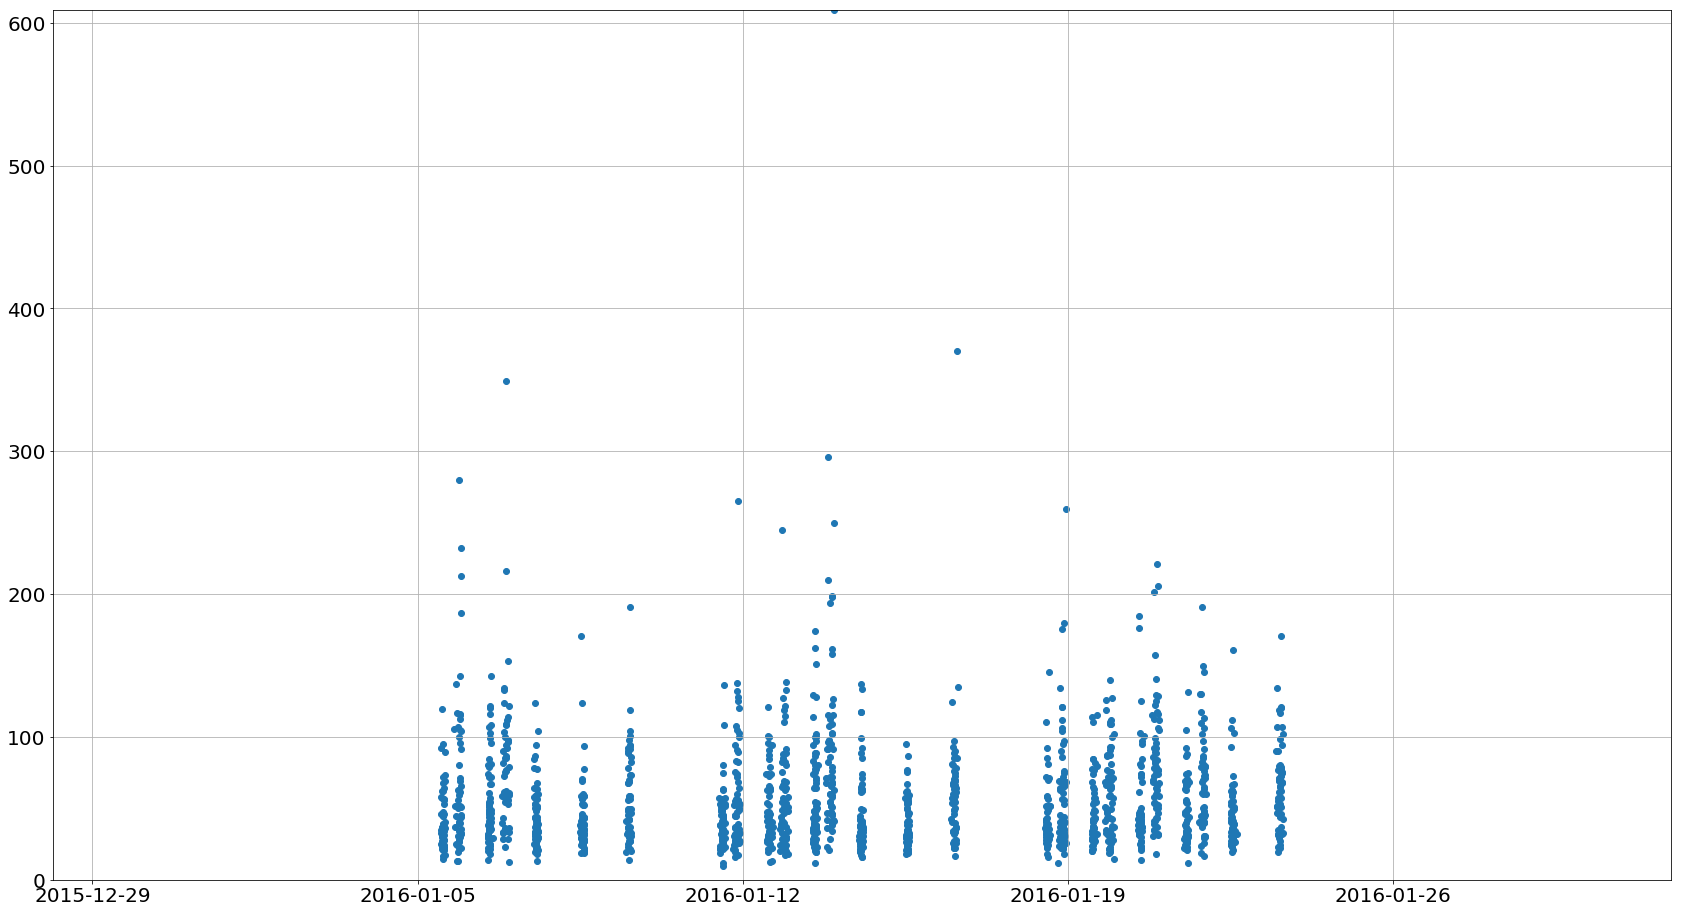

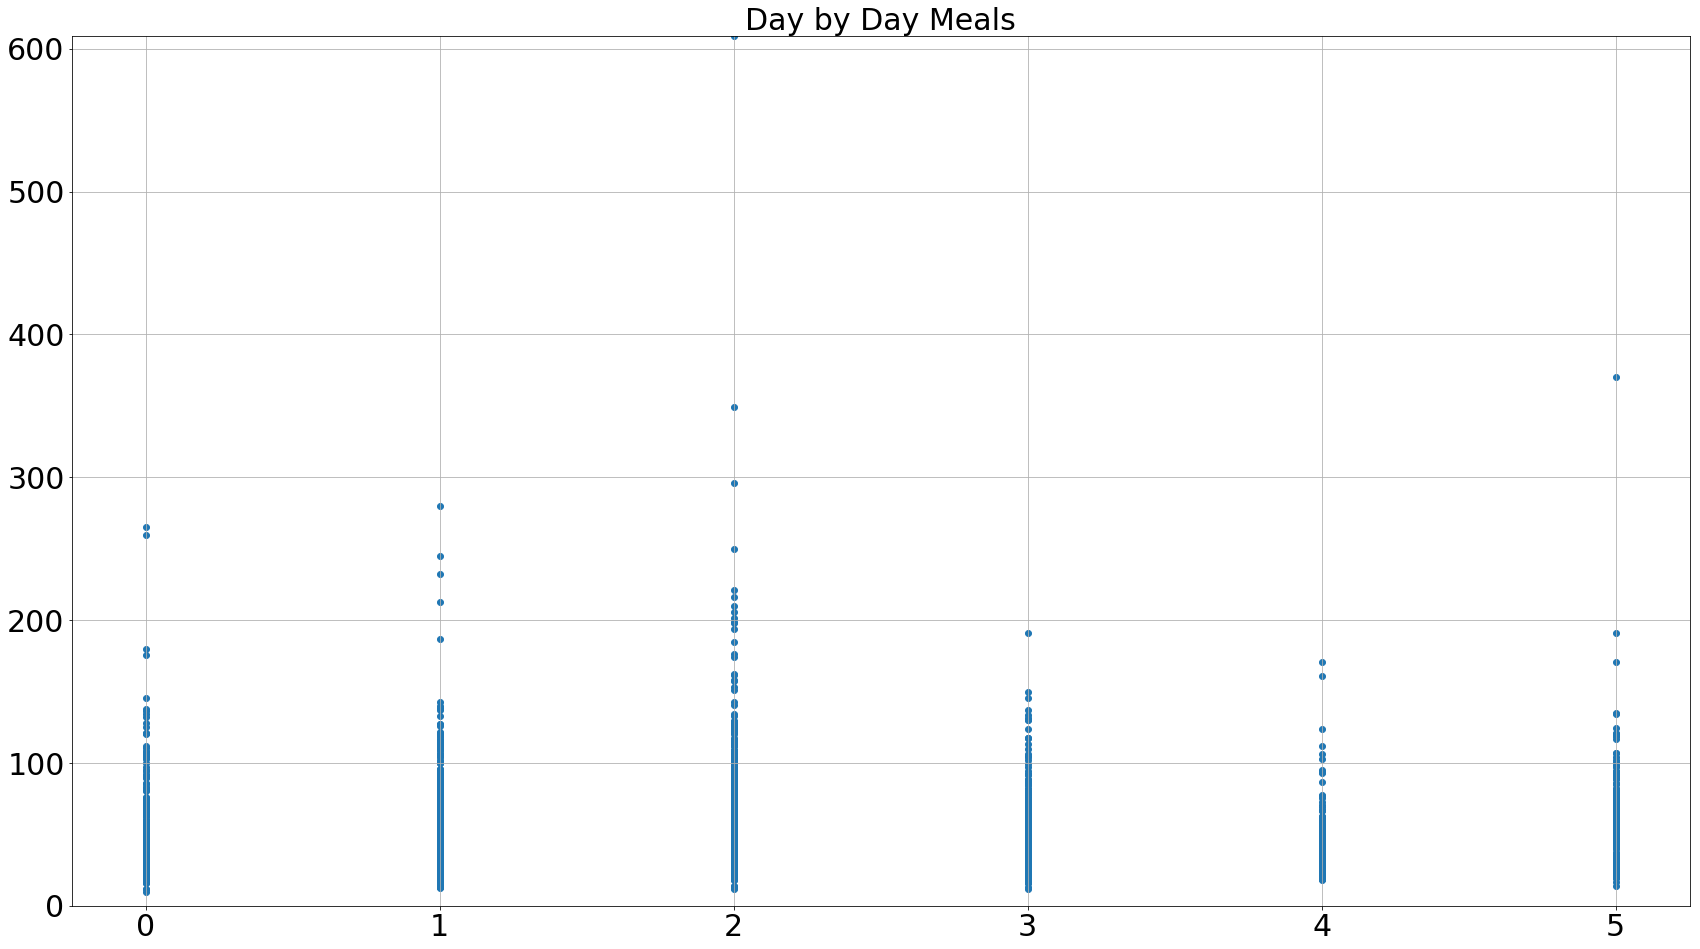

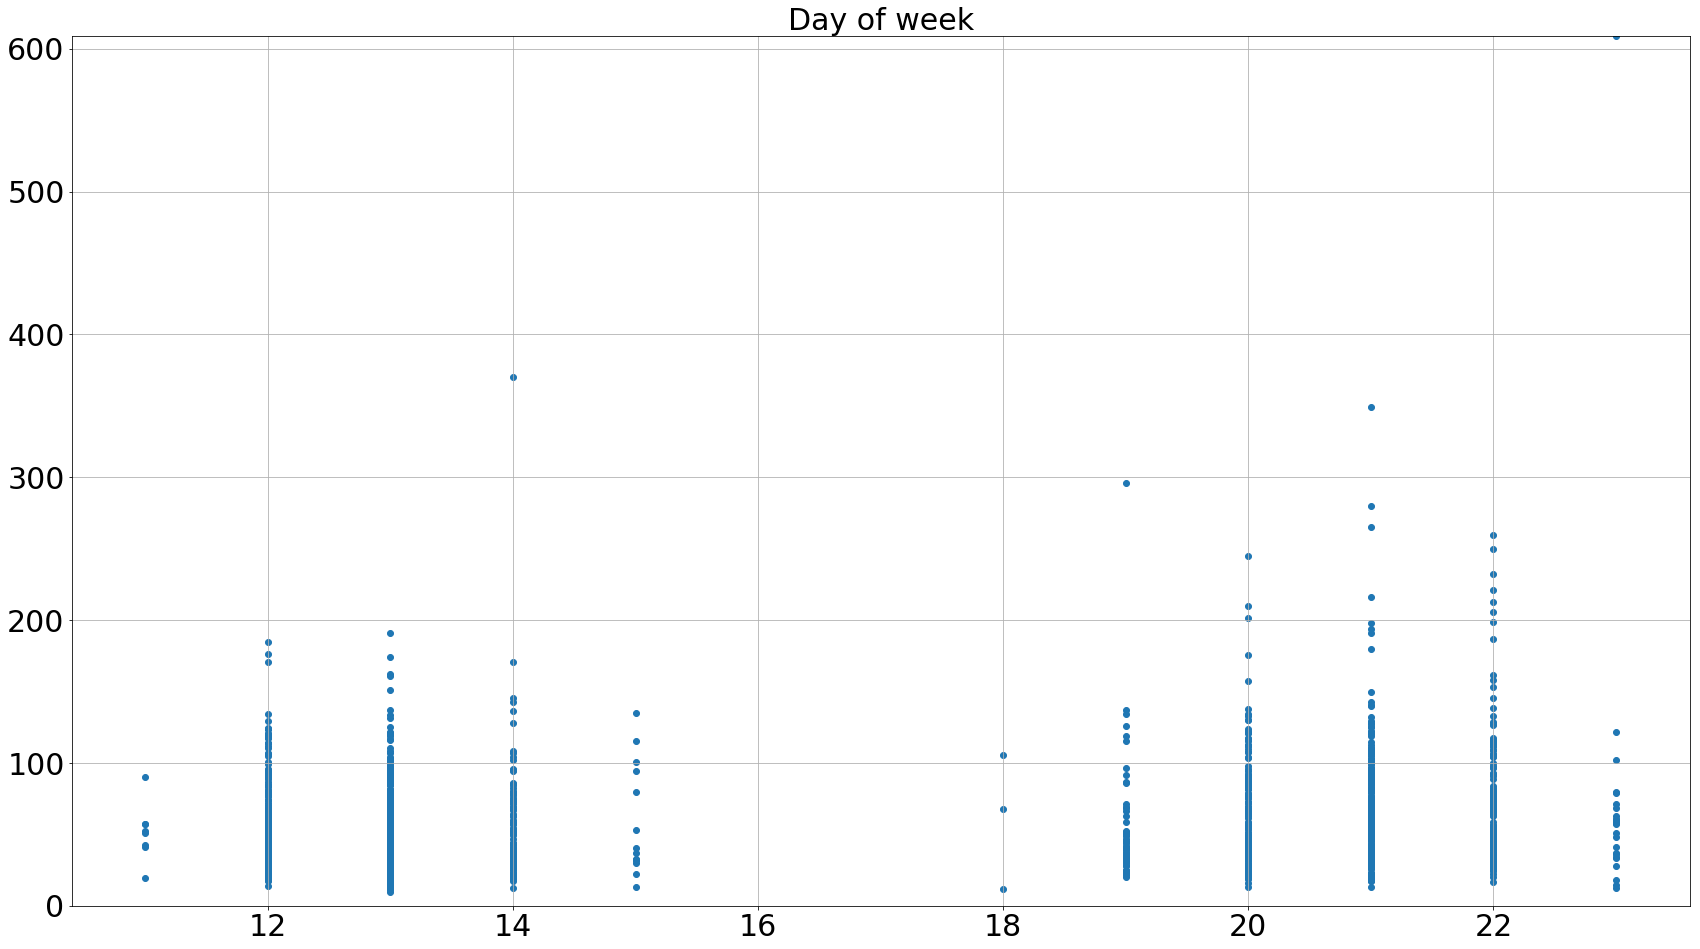

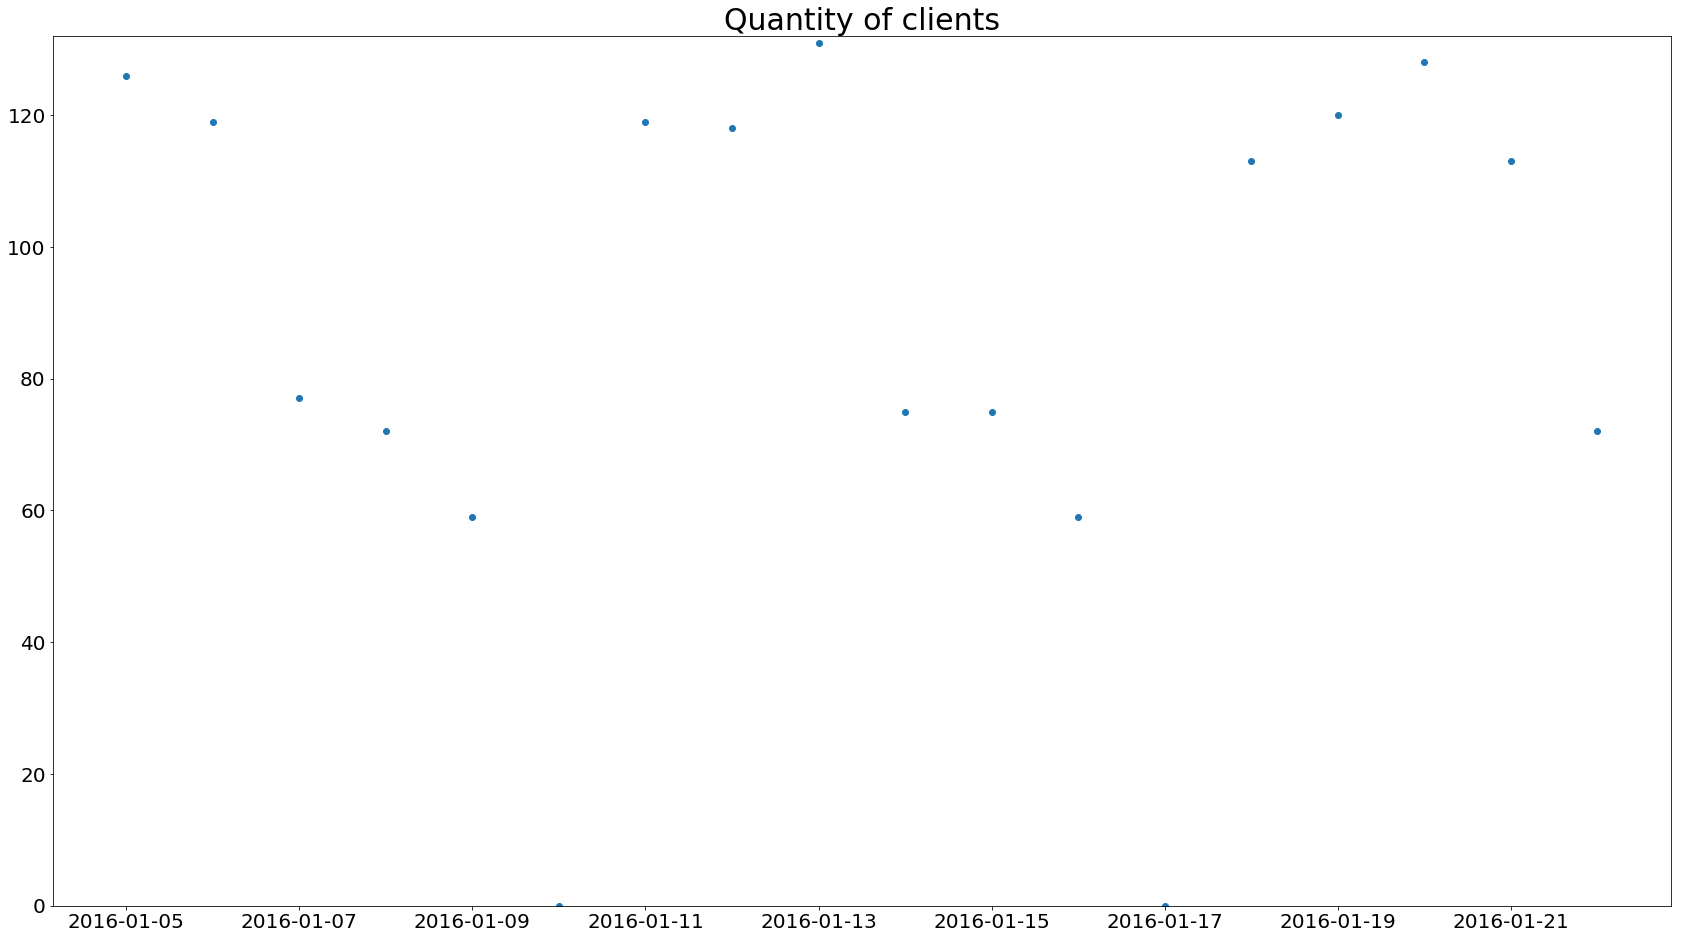

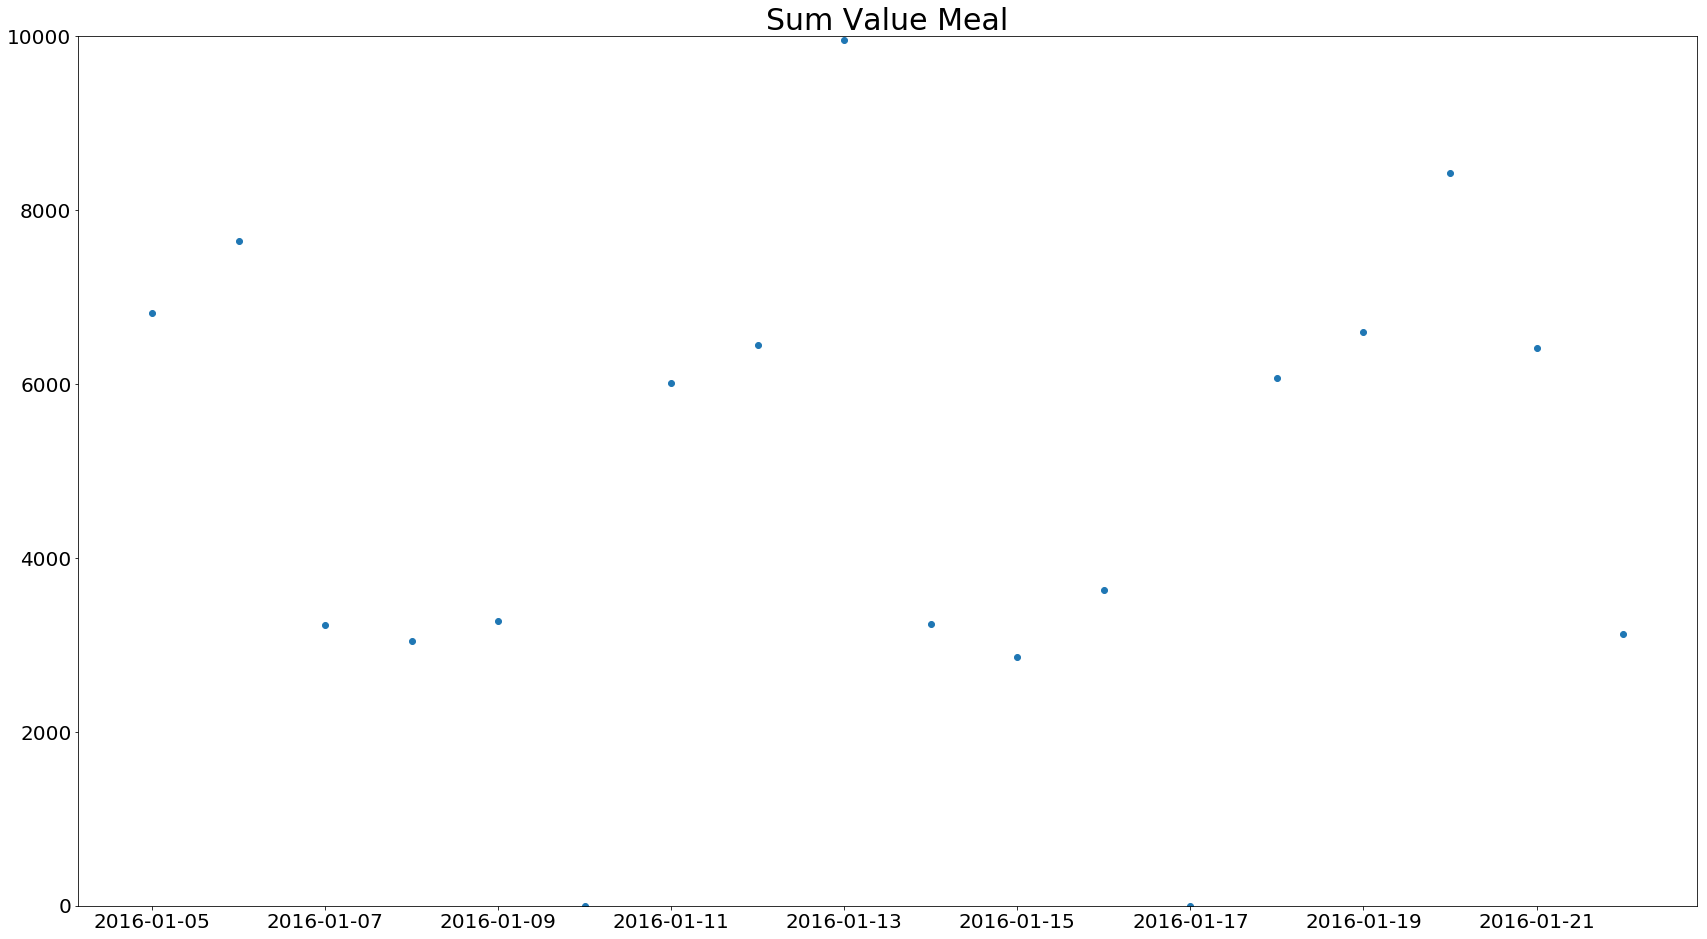

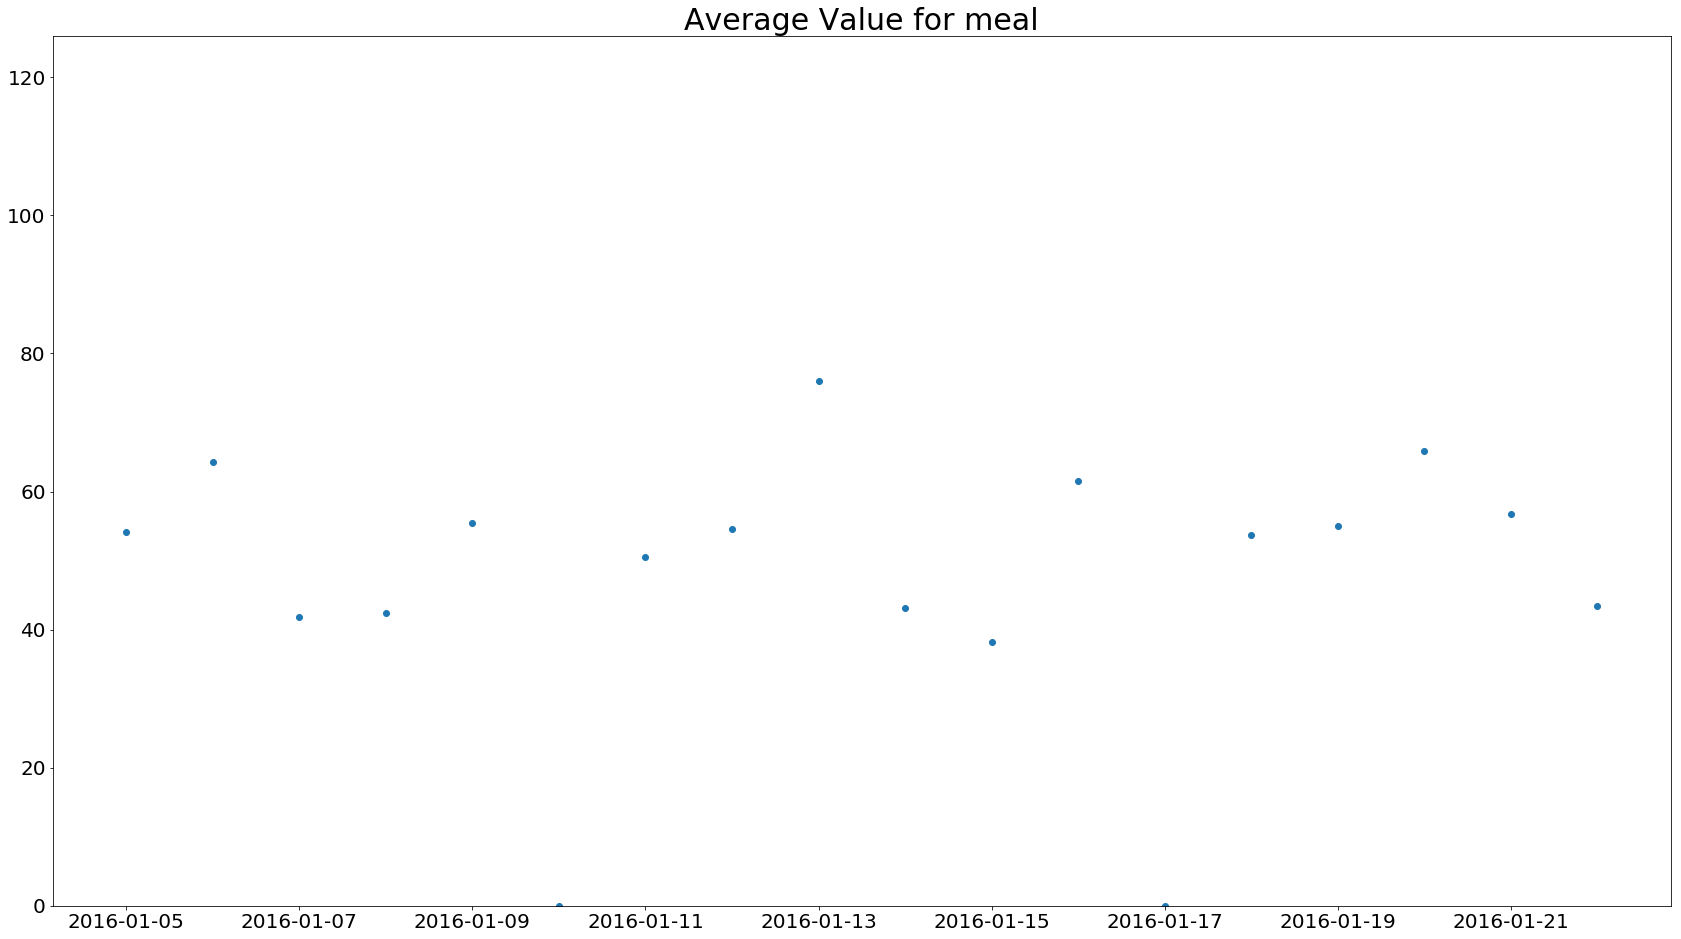

In [233]:
listCollect =[[],[], [], [], [], [], []]

day1Hol = datetime.datetime(2016, 1, 18, 0, 0, 0)
day2Hol = datetime.datetime(2016, 1, 19, 0, 0, 0)
day3Hol = datetime.datetime(2016, 1, 20, 0, 0, 0)
for cont, val in enumerate(data):
    listCollect[0].append(data[cont]['complemento']['valorTotal'])  # Price
    dt = datetime.datetime.strptime(data[cont]['ide']['dhEmi']['$date'], "%Y-%m-%dT%H:%M:%S.%fZ")
    df = dt.weekday()
    listCollect[4].append(len(data[cont]['dets']))
    hourmoment = dt.strftime('%H')
    hourmoment = int(hourmoment)
    
    mesaStr = data[cont]['infAdic']['infCpl']
    mesaint = mesaStr[4:]
    mesaint = int(mesaint)
    listCollect[6].append(mesaint)
    listCollect[1].append(dt)
    listCollect[2].append(df) # Week day
    listCollect[3].append(hourmoment)  # Hour of day
    if day1Hol <= dt <= day2Hol or day2Hol <= dt <= day3Hol: 
        listCollect[5].append(1) # Holiday
    else:
        listCollect[5].append(0)

plot_date(listCollect[1],listCollect[0])
week_day(listCollect[2],listCollect[0], 'Day by Day Meals')
week_day(listCollect[3],listCollect[0], 'Day of week')

# first day
firstday = min(listCollect[1])
endday = max(listCollect[1])
daybeg = firstday.strftime('%d')
mbeg = firstday.strftime('%m')

dayend = endday.strftime('%d')
mend = endday.strftime('%m')

start = datetime.datetime(2016, int(mbeg), int(daybeg),0,0,0)
tomorrow = start + datetime.timedelta(days=1)
end = datetime.datetime(2016, int(mend), int(dayend),0,0,0)


listcomp = [[], [], [], [], []]
while start < end:
    listcomp[0].append(start)
    listcomp[1].append(tomorrow)
    start += datetime.timedelta(days=1)
    tomorrow +=datetime.timedelta(days=1)
            
for cont2, val2 in enumerate(listcomp[0]):
    buf_tr = 0
    buf_val = 0
    for cont3, val3 in enumerate(listCollect[1]):
        if val2 <= val3 <= listcomp[1][cont2]:
            buf_tr += 1
            buf_val += listCollect[0][cont3]
    
    
    if buf_tr <= 0:
        medianval = 0
    else:
        medianval = buf_val / buf_tr
    listcomp[2].append(buf_tr)
    listcomp[3].append(buf_val)
    listcomp[4].append(medianval)

plot_form(listcomp[0],listcomp[2], max(listcomp[2])+1, 'Quantity of clients')
plot_form(listcomp[0],listcomp[3], max(listcomp[3])+50, 'Sum Value Meal')
plot_form(listcomp[0],listcomp[4], max(listcomp[4])+50, 'Average Value for meal')
            

### During the dinner is more expansive the cost
### On Tuesday, normally the people expend more during the dinner. On thursday, the  value is not so expensive

### To generate a model, we need to identify the features to feed up our model.
### Our model is going to predict the cost of a meal, using:
     # Day of week
     # Holiday (0 = No / 1 = Yes)
     # Hour (0 / 23)
     # average of last week
         # if does not have the data, where are going to feed the average of our data.
### average of last two weeks
### holiday on the day - 01/18 and 01/19 on 2016

# Elimination of outliers

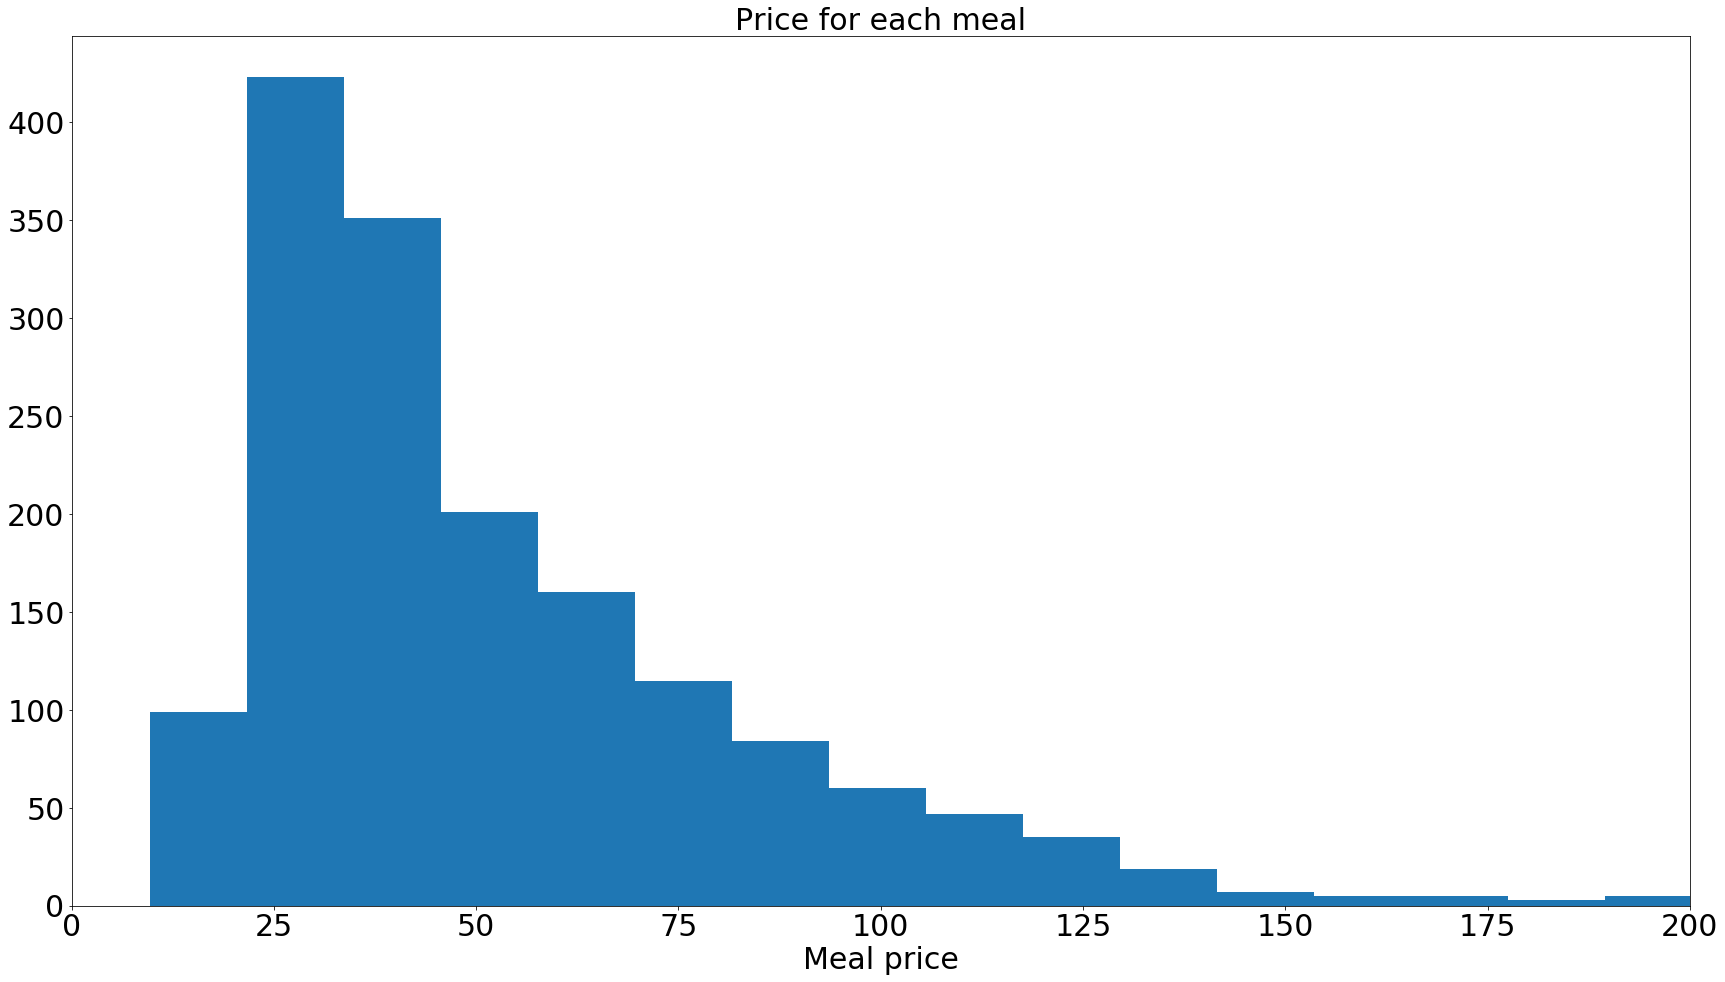

Median value: 43.26
Average value: 55.50417125382263
Percentage higher than 150: 5.259938837920489%


In [268]:
# Verify histogram
plot_hist(listCollect[0],'Price for each meal')
print ('Median value: {}'.format(np.median(listCollect[0])))
print ('Average value: {}'.format(np.average(listCollect[0])))
buf = 0 
for cont, val in enumerate(listCollect[0]):
    if val > 120:
        buf += 1
    else:
        pass
print ('Percentage higher than 150: {}%'.format((100 * buf/len(listCollect[0]))))


## According with the data, the values higher than 120 are outliers, so we need to clean this data to not contaminate the final algorithm

In [281]:
NewList = [[],[],[],[],[],[],[],[]]
for cont, val in enumerate(listCollect[0]):
    if val <= 120:
        NewList[0].append(val)
        NewList[1].append(listCollect[1][cont])
        NewList[2].append(listCollect[2][cont])
        NewList[3].append(listCollect[3][cont])
        NewList[4].append(listCollect[4][cont])
        NewList[5].append(listCollect[5][cont])
        NewList[6].append(listCollect[6][cont])
    else:
        pass


# Model creation MLP Regressor

In [282]:
features = {'Day': NewList[2],
            'Holiday': NewList[5],
            'Hour': NewList[3], 
            'Itens': NewList[4],
            'NumberTable': NewList[6]}
value = {
    'Value': NewList[0]}
features = pd.DataFrame(features)
y = pd.DataFrame(value)
X = features


In [283]:
# Use a 
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Now it is the moment to create the training for the algorithm.
## 30% porcentage for. test, and test with 70% of the data
## The input of our algorithm are the future.
## The activations could be between 4 ~80, and we need to define the quantity of hidden layers to generate the lowest mean average error

best MAE: 15.562033861441662
best MAPE: 33.18208067770145
best quantity of activations: 78


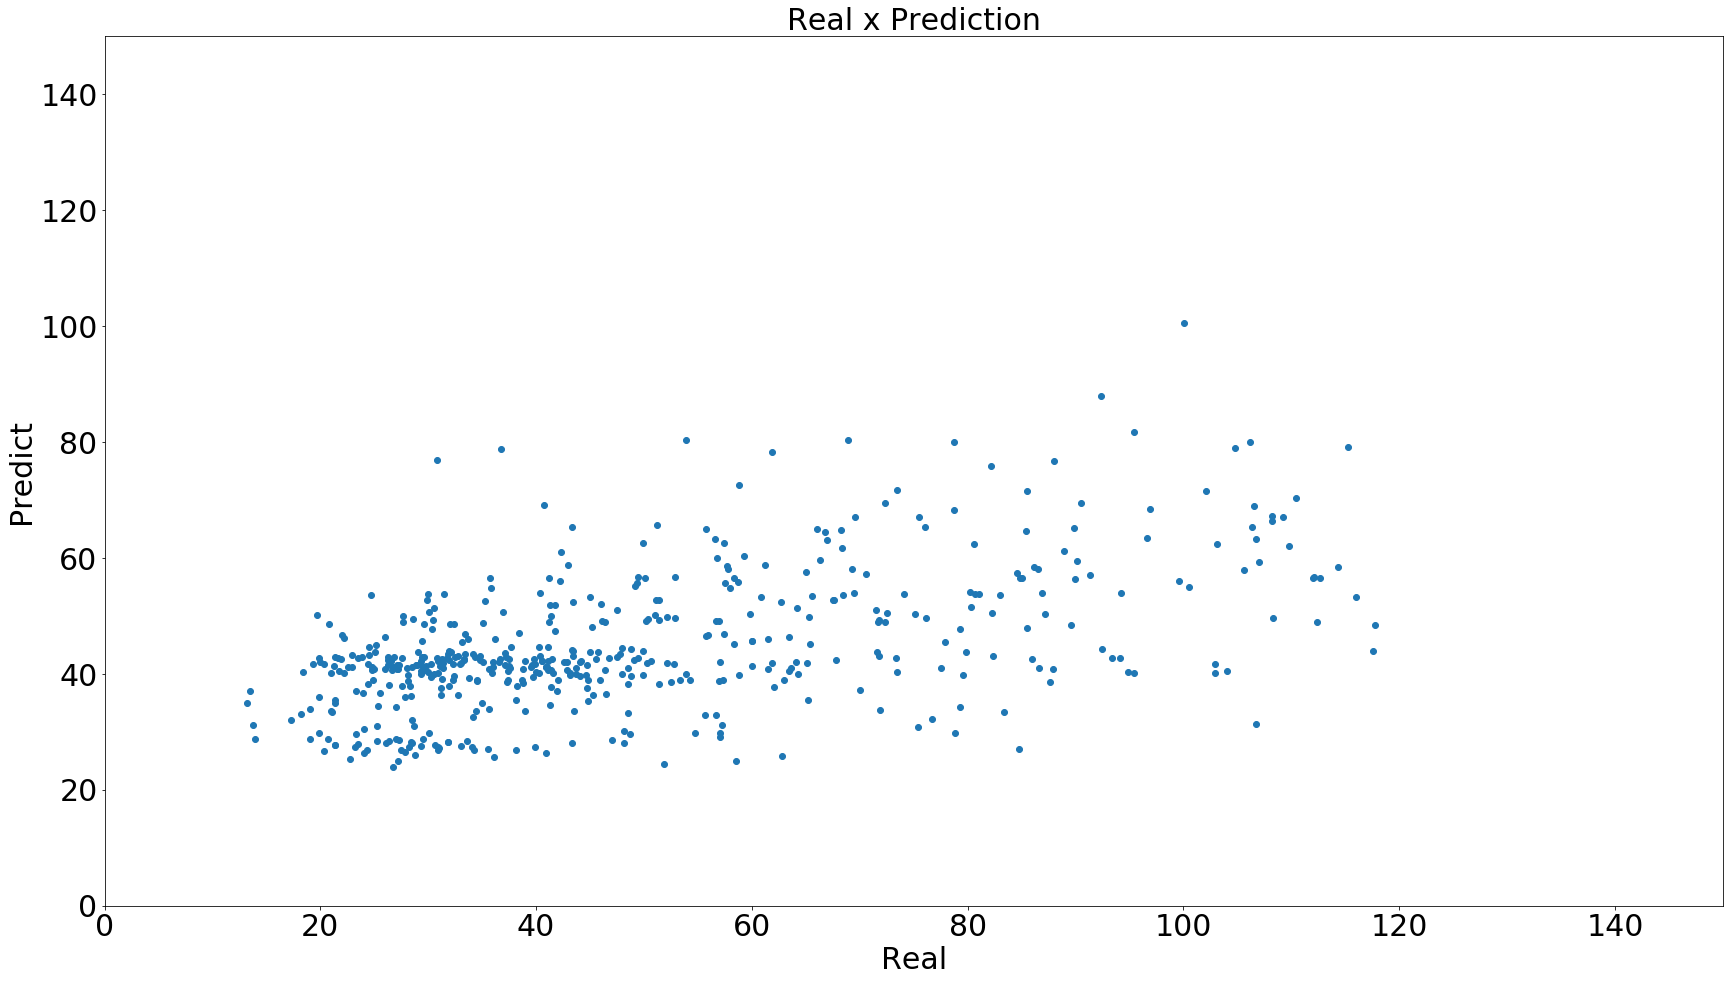

In [284]:
bestval_mape = 100
bestval_mae = 100
bestval_activ = 100
bestval_y_predic = []
best_r2val = 100
for a in range(4, 80):
    train_gen = MLPRegressor(hidden_layer_sizes=(a, a, a, a, a, a, a, a), activation='relu', solver='adam', max_iter=2000)
    train_gen = train_gen.fit(X_train, np.ravel(y_train))

    y_predic = train_gen.predict(X_test)

    # verify error

    mae = mean_absolute_error(y_predic, np.ravel(y_test))
    r2_val = r2_score(y_predic, np.ravel(y_test))
   

    mape = np.mean(np.abs((np.ravel(y_test) - y_predic) / np.ravel(y_test))) * 100
    
    if mae < bestval_mae:
        bestval_mae = mae
        bestval_mape = mape
        bestval_activ = a
        bestval_y_predic = y_predic
        best_r2val = r2_val
        
    else:
        pass

print ('best MAE: {}'.format(bestval_mae))
print ('best MAPE: {}'.format(bestval_mape))
print ('best quantity of activations: {}'.format(bestval_activ))
plot_results(np.ravel(y_test), bestval_y_predic, 150, 'Real x Prediction')



### Best use with 8 hidden layers